# Fake Image Detector

## Imports

In [60]:
%matplotlib inline 
import urllib, cStringIO
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import urllib2
import scipy
import scipy.misc
from scipy import spatial as sp
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup
import re

from unidecode import unidecode

## Image Loading

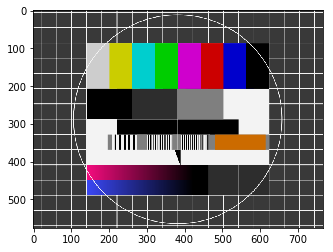

In [2]:
URL = "https://raw.githubusercontent.com/plu/JPSimulatorHacks/master/Data/test.png"
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = Image.open(file)
#img.thumbnail((256, 256), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

In [3]:
#exif_data = img._getexif()

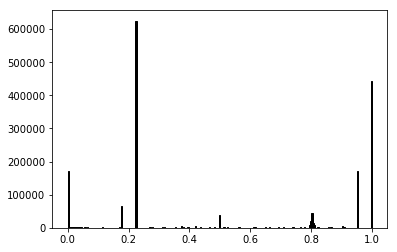

In [4]:
img=mpimg.imread(URL)
hist=plt.hist(img.ravel(),bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [5]:
#create target folder
directory="data/test/"
if not os.path.exists(directory):
    os.makedirs(directory)
    print("%s path created" %directory)
    
#write on disk
img = urllib2.urlopen(URL)   
with open(directory+"%s.jpg" %("test"), 'wb') as f:
    f.write(img.read())

## Reverse Image research

In [10]:
import pycurl
import json
#from flask import Flask, url_for, json, request
python3 = False
try:
    from StringIO import StringIO
except ImportError:
    python3 = True
    import io as bytesIOModule
from bs4 import BeautifulSoup
if python3:
    import certifi
SEARCH_URL = 'https://www.google.com/searchbyimage?&image_url='

In [116]:
def doImageSearch(image_url):
    """Perform the image search and return the HTML page response."""

    if python3:
        returned_code = bytesIOModule.BytesIO()
    else:
        returned_code = StringIO()
    full_url = SEARCH_URL + image_url


    conn = pycurl.Curl()
    if python3:
        conn.setopt(conn.CAINFO, certifi.where())
    conn.setopt(conn.URL, str(full_url))
    conn.setopt(conn.FOLLOWLOCATION, 1)
    conn.setopt(conn.USERAGENT, 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.97 Safari/537.11')
    conn.setopt(conn.WRITEFUNCTION, returned_code.write)
    conn.perform()
    conn.close()
    if python3:
        return returned_code.getvalue().decode('UTF-8')
    else:
        return returned_code.getvalue()
    
def parseResults(code):
    """Parse/Scrape the HTML code for the info we want."""

    soup = BeautifulSoup(code, 'html.parser')

    results = {
        'links': [],
        'descriptions': [],
        'titles': [],
        'similar_images': []
    }

    for div in soup.findAll('div', attrs={'class':'g'}):
        sLink = div.find('a')
        results['links'].append(sLink['href'])

    for desc in soup.findAll('span', attrs={'class':'st'}):
        results['descriptions'].append(desc.get_text())

    for title in soup.findAll('h3', attrs={'class':'r'}):
        results['titles'].append(title.get_text())

    for similar_image in soup.findAll('div', attrs={'rg_meta'}):
        tmp = json.loads(similar_image.get_text())
        img_url = tmp['ou']
        results['similar_images'].append(img_url)

    #return json.dumps(results)
    return results

def extract_reverse_url(dic):
    if dic:
        return dic['links']
    else:
        return

In [117]:
#URL = "http://www.legorafi.fr/wp-content/uploads/2017/06/iStock-kupicoo-e1498205951780-820x465.jpg"
#URL = "http://cpaquebec.ca/~/media/images/communaute-cpa/regroupements-regionaux/jeunes-cpa-montreal/Party-Post-EFC_bandeau_web_570x200.jpg"
#URL ="http://i.f1g.fr/media/figaro/805x453_crop/2017/06/24/XVMfb91733a-58c9-11e7-9bb8-f4ad8e4a4fd1.jpg"
#URL = "http://i.f1g.fr/media/figaro/805x453_crop/2017/06/24/XVM724f8754-58df-11e7-9bb8-f4ad8e4a4fd1.jpg"
URL = 'http://i.f1g.fr/media/ext/960x600_crop/sport24.lefigaro.fr/var/plain_site/storage/images/rugby/xv-de-france/actualites/afrique-du-sud-france-en-direct-865353/23165757-3-fre-FR/Sans-solution-les-Bleus-encore-battus-en-Afrique-du-Sud.jpg'
junk = doImageSearch(URL)
out = parseResults(junk)

In [118]:
out

{'descriptions': [u'tackle - traduction anglais-fran\xe7ais. Forums pour discuter de tackle, voir ses formes compos\xe9es, des exemples et poser vos questions. Gratuit.',
  u'De tr\xe8s nombreux exemples de phrases traduites contenant "tackle" \u2013 Dictionnaire fran\xe7ais-anglais et moteur de recherche de traductions fran\xe7aises.'],
 'links': [u'http://www.wordreference.com/enfr/tackle',
  u'http://www.linguee.fr/anglais-francais/traduction/tackle.html',
  u'/search?tbs=simg:CAEStwIJ9fHXFjtm6Q0aqwILEKjU2AQaBAgACEIMCxCwjKcIGmIKYAgDEij_1GtMXkAW0EJQFsRH-GvwarxCyEK4rjS-BL6AljC_1RJIAvrSuDL48vGjDeILqZWOMHLM2Ow20S129yXoJw_1MS2Sn9CS0xD0XkGyAzC2LFDcsYKgTtMNDDKsYYgBAwLEI6u_1ggaCgoICAESBLTyFHsMCxCd7cEJGpYBChgKBnRhY2tsZdqliPYDCgoIL20vMDJ3ZzgKIAoMcnVnYnkgcGxheWVy2qWI9gMMCgovbS8wNTc0cmwyCh0KC3J1Z2J5IHVuaW9u2qWI9gMKCggvbS8wNmJyOAoZCgVnYW1lc9qliPYDDAoKL20vMDNidDFnaAoeCgxydWdieSBsZWFndWXapYj2AwoKCC9tLzA2ZjNsDA&q=tackle&tbm=isch&sa=X&ved=0ahUKEwiovubr-tbUAhWGOBoKHdjiAukQsw4INg'],
 'similar_images':

## Distance between same image holders

In [133]:
def dl_text(url):
    html = urllib.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    texts = soup.findAll(text=True)
    return texts

def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', element):
        return False
    return True

def get_main_txt(visible_texts,idx=None):
    if idx:
        size = [len(x) for x in visible_texts]
        size_ = [x for x in size if x<max(size)]
        max_idx=max(size_)
        return visible_texts[size.index(max_idx)]
    else:
        size = [len(x) for x in visible_texts]
        max_idx=max(size)
        return visible_texts[size.index(max_idx)]



In [134]:
html = urllib.urlopen('http://www.nytimes.com/2009/12/21/us/21storm.html').read()
soup = BeautifulSoup(html, 'html.parser')
texts = soup.findAll(text=True)
visible_texts = filter(visible, texts)
get_main_txt(visible_texts)

u' Hundreds of thousands of people lost power as the storm swept eastward on Friday and Saturday, including 135,000 customers in West Virginia served by Appalachian Power, a division of American Electric Power. That company also reported 19,456 outages in Tennessee on Saturday afternoon, and its Kentucky division reported 69,400 in that state. Laura Southard, of Virginia\u2019s Department of Emergency Management, said at least 71,000 were without power on Saturday afternoon. In parts of western North Carolina, where the storm struck Friday evening, more than 60,000 customers were without power on Saturday.'

In [135]:
request_headers = {
    "Accept-Language": "en-US,en;q=0.5",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0",
    #"Connection": "keep-alive" 
    }

In [136]:
input_list=[]

for element in out['links'][0:]:
    try:
        if "htt" in element:
            url = "htt"+"".join(element.split("htt")[1:])
            request = urllib2.Request(url, headers=request_headers)
            html = urllib2.urlopen(request).read()
            #html = urllib.urlopen(url).read()
            soup = BeautifulSoup(html, 'html.parser')
            texts = soup.findAll(text=True)
            visible_texts = filter(visible, texts)
            #print(get_main_txt(visible_texts))
            #print(visible_texts)
            main_txt=get_main_txt(visible_texts)
            if "[endif]" in main_txt:
                #main_txt=get_main_txt(visible_texts,idx=1)
                #print(main_txt)
                input_list.append(main_txt)
                print("#______________________________#")
            else:
                print(main_txt)
                input_list.append(main_txt)
                print("#______________________________#")
    except Exception as e:
        print(url)
        print(e)
    

[if lt IE 8]>
<style type="text/css">
#search{height:50px;border-bottom:0 none;}
#forumapi{display:none;}
#si{line-height:30px;} 
#text_form input.button{bottom:-1px;}
.inputcontainer{height:29px;margin-left:2px;}
.content{z-index:0;margin-top:0px}
/* for audio links disrupting AComplete*/
#listen_widget{display:block;width:151px;}
.listen_language, #listen_txt{position:static}
#left, #rsinfo {margin-left:0;padding-left:0;}
#left ul {margin-left:0;}
body{line-height:normal !important;}
</style>
<![endif]
#______________________________#

La plupart d'entre nous sommes parfois distraits par d'autres questions, mais le dommage qui continue d'être infligé à la planète nous signale impérieusement qu'il faut agir pour faire une différence et qu'il faut collaborer pour élaborer des stratégies qui permettront de lutter contre les changements climatiques. 
#______________________________#


In [128]:
for element in out['links'][0:]:
    print element

http://www.wordreference.com/enfr/tackle
http://www.linguee.fr/anglais-francais/traduction/tackle.html
/search?tbs=simg:CAEStwIJ9fHXFjtm6Q0aqwILEKjU2AQaBAgACEIMCxCwjKcIGmIKYAgDEij_1GtMXkAW0EJQFsRH-GvwarxCyEK4rjS-BL6AljC_1RJIAvrSuDL48vGjDeILqZWOMHLM2Ow20S129yXoJw_1MS2Sn9CS0xD0XkGyAzC2LFDcsYKgTtMNDDKsYYgBAwLEI6u_1ggaCgoICAESBLTyFHsMCxCd7cEJGpYBChgKBnRhY2tsZdqliPYDCgoIL20vMDJ3ZzgKIAoMcnVnYnkgcGxheWVy2qWI9gMMCgovbS8wNTc0cmwyCh0KC3J1Z2J5IHVuaW9u2qWI9gMKCggvbS8wNmJyOAoZCgVnYW1lc9qliPYDDAoKL20vMDNidDFnaAoeCgxydWdieSBsZWFndWXapYj2AwoKCC9tLzA2ZjNsDA&q=tackle&tbm=isch&sa=X&ved=0ahUKEwiovubr-tbUAhWGOBoKHdjiAukQsw4INg


In [131]:
input_list

[u"\r\nLa plupart d'entre nous sommes parfois distraits par d'autres questions, mais le dommage qui continue d'\xeatre inflig\xe9 \xe0 la plan\xe8te nous signale imp\xe9rieusement qu'il faut agir pour faire une diff\xe9rence et qu'il faut collaborer pour \xe9laborer des strat\xe9gies qui permettront de lutter contre les changements climatiques. "]

----------------

- ## Image crawler

In [160]:
def find_all_img(url):
    test_url = url
    request = urllib2.Request(test_url)
    page = urllib2.urlopen(request).read()
    soup = BeautifulSoup(page,"html.parser")
    links = soup.findAll('img')
    links = [tag['src'] for tag in links if ".jpg" in tag['src'].lower()]
    return links 


def get_biggest_imgs(links):
    keep=[]
    for element in links:
        file = cStringIO.StringIO(urllib.urlopen(element).read())
        img = Image.open(file)
        keep.append(img.size[0]*img.size[1])
    df = pd.DataFrame()
    df["url"]=links
    df["size"]=keep
    df = df.sort_values("size",ascending=False)
    return df["url"][0:3]

In [150]:
test_url = "http://www.lefigaro.fr/sciences/2017/06/24/01008-20170624ARTFIG00137-emmanuel-macron-proposera-un-pacte-pour-l-environnement-a-l-onu.php"
test = find_all_img(test_url)

In [151]:
test

[u'http://i.f1g.fr/media/figaro/805x453_crop/2017/06/24/XVMf342a5e8-58fe-11e7-9bb8-f4ad8e4a4fd1.jpg',
 u'http://i.f1g.fr/media/ext/55x55/plus.lefigaro.fr/sites/default/files/imagecache/Petite/images/avatar-journalistes-defaut.jpg',
 u'http://i.f1g.fr/media/ext/101x67_crop/i.f1g.fr/media/ext/1900x1900/madame.lefigaro.fr/sites/default/files/img/2017/06/brigitte-liso_0.jpg',
 u'http://i.f1g.fr/media/ext/101x67_crop/i.f1g.fr/media/figaro/805x453_crop/2017/06/23/XVM74cea3b2-582f-11e7-b986-7656cb6ba5ab.jpg',
 u'http://a.f1g.fr/assets-img/footer-carrousel/Cplussur.jpg?bd4e386c627c10684978ebe0f0f6cccb1ad25103',
 u'http://a.f1g.fr/assets-img/footer-carrousel/epresse.jpg?bd4e386c627c10684978ebe0f0f6cccb1ad25103',
 u'http://a.f1g.fr/assets-img/footer-carrousel/Immo.jpg?bd4e386c627c10684978ebe0f0f6cccb1ad25103',
 u'http://a.f1g.fr/assets-img/footer-carrousel/Newsletters.jpg?bd4e386c627c10684978ebe0f0f6cccb1ad25103',
 u'http://a.f1g.fr/assets-img/footer-carrousel/Lachainemeteo.jpg?bd4e386c627c10684

In [161]:
get_biggest_imgs(test)

0    http://i.f1g.fr/media/figaro/805x453_crop/2017...
4    http://a.f1g.fr/assets-img/footer-carrousel/Cp...
5    http://a.f1g.fr/assets-img/footer-carrousel/ep...
Name: url, dtype: object

## Forged image detection

## NEC API

- ## Jack shit

In [126]:
import sys
import requests
import json

gid=1032


# Post Search Request
files = {'image': open(directory+'test.jpg', "rb")}
url = "https://www3.arche.blue/mvp5/v1/%d/search" % gid
res = requests.post(url, files = files)

# Get Response
if res.status_code == 200:
    print json.dumps(res.json(), indent=4)
else:
    print res.text

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request.  Either the server is overloaded or there is an error in the application.</p>



In [164]:
url = "https://www.facebook.com/ABCNewsPolitics/posts/1035057923259100"
request = urllib2.Request(url)
page = urllib2.urlopen(request).read()
soup = BeautifulSoup(page,"html.parser")

In [165]:
soup

<!DOCTYPE html>\n\n<html class="no_js" id="facebook" lang="fr">\n<head><meta charset="unicode-escape"/><meta content="default" id="meta_referrer" name="referrer"/><script>window._cstart=+new Date();</script><script>function envFlush(a){function b(c){for(var d in a)c[d]=a[d];}if(window.requireLazy){window.requireLazy(['Env'],b);}else{window.Env=window.Env||{};b(window.Env);}}envFlush({"ajaxpipe_token":"AXhedJNpeDbzB1OL","timeslice_heartbeat_config":{"pollIntervalMs":33,"idleGapThresholdMs":60,"ignoredTimesliceNames":{"requestAnimationFrame":true,"Event listenHandler mousemove":true,"Event listenHandler mouseover":true,"Event listenHandler mouseout":true,"Event listenHandler scroll":true},"enableOnRequire":false},"shouldLogCounters":true,"timeslice_categories":{"react_render":true,"reflow":true},"dom_mutation_flag":true});</script><style></style><script>__DEV__=0;CavalryLogger=window.CavalryLogger||function(a){this.lid=a;this.transition=false;this.metric_collected=false;this.is_detailed_